In [10]:
using DrWatson
@quickactivate "sst-mot-analysis"

import DrWatson: datadir, srcdir
import DrWatson: @quickactivate
include(srcdir("compare_random_samples.jl"))

using GH19, TMI, PythonCall, Revise

In [11]:
N_sample = 100
Nboot = 5000

5000

### Uniform Sampling Results

In [12]:
uniform_sampl_results  = bootstrap_PI_lgm_differences(N_sample, Nboot; sampling_method=:uniform);

A
  0.020184 seconds (4.36 k allocations: 34.887 MiB)
Alu
  0.555347 seconds (88 allocations: 477.426 MiB, 3.27% gc time)
L=
  0.002762 seconds (764 allocations: 63.273 KiB)
B=
  0.001968 seconds (763 allocations: 63.250 KiB)
A
  0.041057 seconds (5.23 k allocations: 118.943 MiB)
Alu
  4.358247 seconds (91 allocations: 2.810 GiB, 0.28% gc time)
L=
  0.126138 seconds (8.14 M allocations: 224.521 MiB)
B=
  0.012844 seconds (6.14 k allocations: 7.270 MiB)
A
  0.035550 seconds (5.23 k allocations: 118.943 MiB, 23.18% gc time)
Alu
  4.603405 seconds (88 allocations: 2.810 GiB, 0.03% gc time)
L=
  0.140396 seconds (8.14 M allocations: 228.552 MiB)
B=
  0.011700 seconds (6.14 k allocations: 7.270 MiB)


Running 5000 MC trials (n=100).. 100%|███████████████████| Time: 0:04:05


dSST-TMI: 2.3314984548820004
dMOT-TMI: 1.9506817742707312


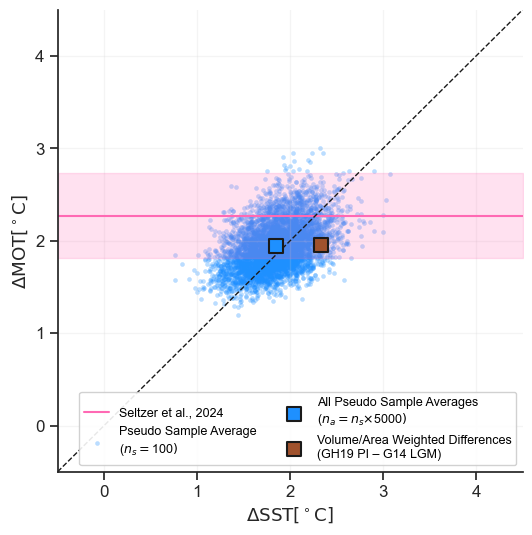

In [13]:
generate_temperature_difference_plot(
    uniform_sampl_results,
    :uniform, N_sample, Nboot, plotsdir("LGM_PI_Temp_diff_weighted_uniformly_sampled.png")
);

### Spherical Sampling Results

In [14]:
spherical_sampl_results  = bootstrap_PI_lgm_differences(N_sample, Nboot; sampling_method=:spherical);

A
  0.020971 seconds (4.34 k allocations: 34.887 MiB)
Alu
  0.583731 seconds (88 allocations: 477.426 MiB, 7.04% gc time)
L=
  0.002490 seconds (764 allocations: 63.273 KiB)
B=
  0.001696 seconds (763 allocations: 63.250 KiB)
A
  0.043899 seconds (5.23 k allocations: 122.974 MiB)
Alu
  4.026314 seconds (91 allocations: 2.810 GiB, 0.63% gc time)
L=
  0.118022 seconds (8.14 M allocations: 224.520 MiB)
B=
  0.013818 seconds (6.14 k allocations: 7.270 MiB)
A
  0.026483 seconds (5.23 k allocations: 118.943 MiB)
Alu
  4.555102 seconds (88 allocations: 2.810 GiB, 0.20% gc time)
L=
  0.119980 seconds (8.14 M allocations: 224.520 MiB)
B=
  0.011606 seconds (6.14 k allocations: 7.270 MiB)


Running 5000 MC trials (n=100).. 100%|███████████████████| Time: 0:04:06


dSST-TMI: 2.3314984548820004
dMOT-TMI: 1.9506817742707312


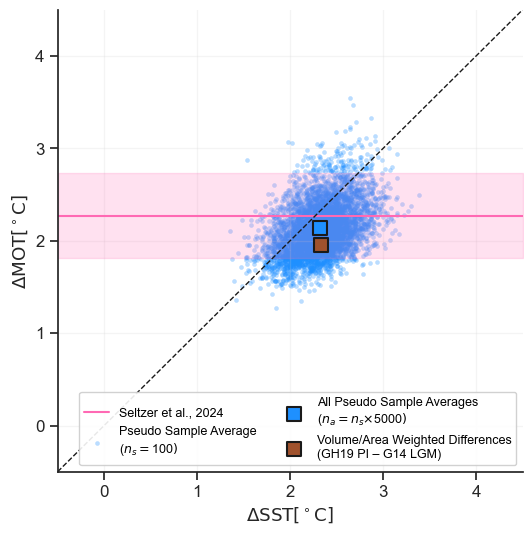

(<py Figure size 600x600 with 1 Axes>, <py Axes: xlabel='$\\Delta \\text{SST}$$[^\\circ \\text{C}]$', ylabel='$\\Delta \\text{MOT}$$[^\\circ \\text{C}]$'>)

In [15]:
generate_temperature_difference_plot(
    spherical_sampl_results,
    :spherical, N_sample, Nboot, plotsdir("1.LGM_PI_Temp_diff_weighted_spherical_sampled.png")
)

In [16]:
bootstrapped_profiles = spherical_sampl_results["bootstrapped_profiles"]
delta_sst = vec(mean(bootstrapped_profiles["PI_surface"] .-
                     bootstrapped_profiles["LGM_surface"], dims=1));
delta_mot = vec(mean(bootstrapped_profiles["PI_bottom"] .-
                     bootstrapped_profiles["LGM_bottom"], dims=1));

In [17]:
get_CI(x) = round.((quantile(x, 0.025), quantile(x, 0.975)), digits = 2)

println("dSST Mean ", round(mean(delta_sst), digits = 1))
println("dSST CI ", get_CI(delta_sst))

println("dMOT Mean ", round(mean(delta_mot), digits = 1))
println("dMOT CI ", get_CI(delta_mot))

dSST Mean 2.3
(1.78, 2.88)
dMOT Mean 2.1
dMOT CI (1.66, 2.77)


In [20]:
mot_sst_ratio = delta_mot ./ delta_sst;

In [21]:
100 * sum(mot_sst_ratio .> 1) / length(mot_sst_ratio)

26.06